In [35]:
# 다음 데이터는 사고 위험 점수와 자동차 의자의 위치를 조사한 데이터이다.

# 의자의 위치가 사고 위험 점수에 영향이  있는지 설명하시오.

In [36]:
import pandas as pd
import statsmodels.formula.api as smf
import statsmodels.api as sm
import matplotlib.pyplot as plt
import statsmodels.stats.multicomp as mc
from scipy import stats

In [37]:
data1 = pd.read_csv("HW7_data.csv")
data1.head()

,Total,Location
0,37,low
1,57,low
2,65,low
3,20,low
4,36,low


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


Text(0.5, 1.0, '')

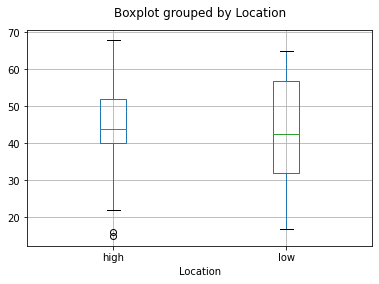

In [38]:
data1.boxplot("Total" , by = "Location")
plt.title("")

In [39]:
fit = smf.ols("Total ~ C(Location, Sum)" , data = data1).fit()
table = sm.stats.anova_lm(fit)
print(table)

# PR(= 0.8459) > 0.05 -> 의자의 위치는 사고 위험 점수에 영향이 없음.

                    df       sum_sq     mean_sq         F    PR(>F)
C(Location, Sum)   1.0     7.932587    7.932587  0.038212  0.845939
Residual          43.0  8926.511858  207.593299       NaN       NaN


In [40]:
#사후분석
comp = mc.MultiComparison(data1["Total"] , data1["Location"])
comptable, _ , _ = comp.allpairtest(stats.ttest_ind, method = "bonf")
comptable

group1,group2,stat,pval,pval_corr,reject
high,low,0.1955,0.8459,0.8459,False
